In [163]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB
from sklearn.metrics import accuracy_score
import numpy as np 
import matplotlib.pyplot as plt

btc_data = pd.read_csv('../../filtered_data/eth_daily_filtered.csv')
btc_data

,ID,Date,Price (GBP),Market Cap (GBP),Total Volume,% 24hr Change,% 7d Change,Class
0,1,2015-08-07 00:00:00,1.826173,0.000000e+00,5.844408e+04,0.00,0.00,stay the same
1,2,2015-08-08 00:00:00,0.831835,5.021919e+07,2.300759e+05,-54.45,0.00,decrease
2,3,2015-08-10 00:00:00,0.441134,2.666127e+07,2.569256e+05,-46.97,0.00,decrease
3,4,2015-08-11 00:00:00,0.685117,4.142558e+07,9.749977e+05,55.31,0.00,increase
4,5,2015-08-12 00:00:00,0.804621,4.867198e+07,1.327933e+06,17.44,0.00,increase
...,...,...,...,...,...,...,...,...
2920,2922,2023-08-07 00:00:00,1432.753715,1.721684e+11,2.347378e+09,-0.47,-1.08,decrease
2921,2923,2023-08-08 00:00:00,1429.301412,1.716654e+11,5.992983e+09,-0.24,-1.23,decrease
2922,2924,2023-08-09 00:00:00,1456.918910,1.750967e+11,5.883180e+09,1.93,-0.26,increase
2923,2925,2023-08-10 00:00:00,1459.058604,1.753254e+11,4.725006e+09,0.15,0.98,increase


In [164]:
from sklearn.preprocessing import LabelEncoder

# Assuming you have a target label column named 'target' in your DataFrame
label_encoder = LabelEncoder()
btc_data['Class'] = label_encoder.fit_transform(btc_data['Class'])

# Get the mapping between the encoded labels and the original classes
label_mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))

# Print the mapping
for encoded_label, original_class in label_mapping.items():
    print(f"Encoded Label: {encoded_label} --> Original Class: {original_class}")
    
btc_data

Encoded Label: 0 --> Original Class: decrease
Encoded Label: 1 --> Original Class: increase
Encoded Label: 2 --> Original Class: stay the same


,ID,Date,Price (GBP),Market Cap (GBP),Total Volume,% 24hr Change,% 7d Change,Class
0,1,2015-08-07 00:00:00,1.826173,0.000000e+00,5.844408e+04,0.00,0.00,2
1,2,2015-08-08 00:00:00,0.831835,5.021919e+07,2.300759e+05,-54.45,0.00,0
2,3,2015-08-10 00:00:00,0.441134,2.666127e+07,2.569256e+05,-46.97,0.00,0
3,4,2015-08-11 00:00:00,0.685117,4.142558e+07,9.749977e+05,55.31,0.00,1
4,5,2015-08-12 00:00:00,0.804621,4.867198e+07,1.327933e+06,17.44,0.00,1
...,...,...,...,...,...,...,...,...
2920,2922,2023-08-07 00:00:00,1432.753715,1.721684e+11,2.347378e+09,-0.47,-1.08,0
2921,2923,2023-08-08 00:00:00,1429.301412,1.716654e+11,5.992983e+09,-0.24,-1.23,0
2922,2924,2023-08-09 00:00:00,1456.918910,1.750967e+11,5.883180e+09,1.93,-0.26,1
2923,2925,2023-08-10 00:00:00,1459.058604,1.753254e+11,4.725006e+09,0.15,0.98,1


In [165]:
selected_columns= btc_data.iloc[:, [2, 3, 4, 5, 6, 7]]

# Split the data into features (X) and target label (y)
X= selected_columns.iloc[:, :-1]  # Features (columns 2, 3, 4)
y= selected_columns.iloc[:, -1]   # Target label (column 7)# Standardize the data

In [166]:
selected_columns

,Price (GBP),Market Cap (GBP),Total Volume,% 24hr Change,% 7d Change,Class
0,1.826173,0.000000e+00,5.844408e+04,0.00,0.00,2
1,0.831835,5.021919e+07,2.300759e+05,-54.45,0.00,0
2,0.441134,2.666127e+07,2.569256e+05,-46.97,0.00,0
3,0.685117,4.142558e+07,9.749977e+05,55.31,0.00,1
4,0.804621,4.867198e+07,1.327933e+06,17.44,0.00,1
...,...,...,...,...,...,...
2920,1432.753715,1.721684e+11,2.347378e+09,-0.47,-1.08,0
2921,1429.301412,1.716654e+11,5.992983e+09,-0.24,-1.23,0
2922,1456.918910,1.750967e+11,5.883180e+09,1.93,-0.26,1
2923,1459.058604,1.753254e+11,4.725006e+09,0.15,0.98,1


In [167]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

In [168]:
#NB MODEL
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

In [169]:
type(X)

pandas.core.frame.DataFrame

In [170]:
from sklearn.model_selection import cross_val_score

# Initialize a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Perform cross-validation
cv_scores = cross_val_score(nb_classifier, X_normalized, y, cv=10)  # 5-fold cross-validation

# Print the cross-validation scores
print("\nCross-Validation Scores:\n", cv_scores)
print("\nMean Accuracy:", np.mean(cv_scores))

Accuracy: 0.8041002277904328

Cross-Validation Scores:
 [0.77133106 0.52901024 0.76791809 0.84641638 0.85665529 0.85958904
 0.90410959 0.65068493 0.83561644 0.82876712]

Mean Accuracy: 0.7850098181308149


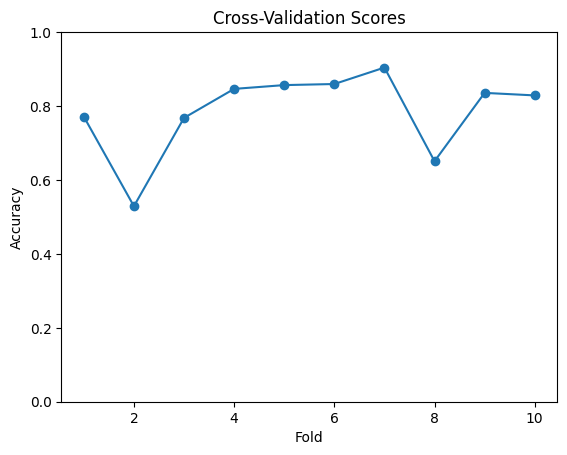

In [171]:
# Plot the cross-validation scores
plt.plot(np.arange(1, 11), cv_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.ylim([0, 1])  # Set the y-axis limits
plt.show()

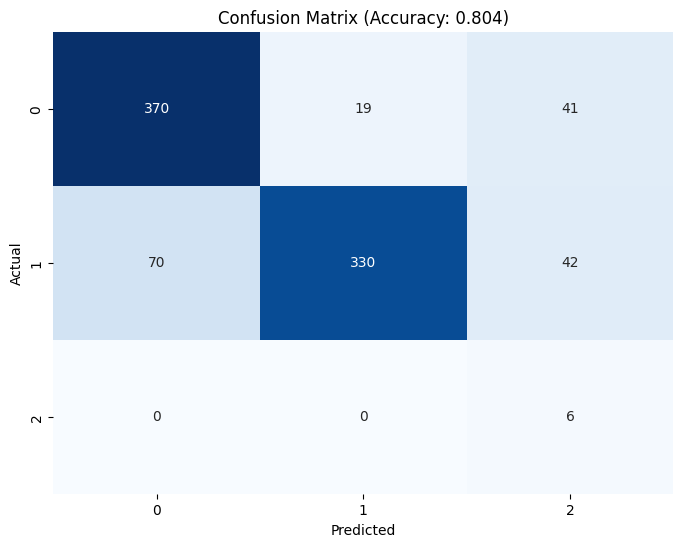

In [172]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming you have predicted labels stored in y_pred and true labels stored in y_test

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix (Accuracy: {accuracy:.3f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [173]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predicted labels stored in y_pred and true labels stored in y_test

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Precision: 0.8883
Recall: 0.8041
F1 Score: 0.8375
